# MTH9879 Homework 2

Assigned: February 7, 2017.
Due: February 21, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.


* **Author: Hongchao Pan**
* Kernel Version: R 3.3.2
* Packages/Libraries: repr
* Notes:
    * The running time of this notebook is around 2mins (MacOS i5)
    * Formula of Q4(e) should be: $\sigma^2_{DA} = \frac{\mu\,\delta}{\alpha^2} \rightarrow $ $\sigma^2_{DA} = \frac{\mu^2\,\delta}{\alpha^2}.$

In [1]:
# Loading libraries
library(repr) # For changing plot features

In [2]:
# Record the total running time of this notebook
# Starting record the time
ptm<-proc.time()

### 0. (0 points) 

Read Chapter 12 of Hasbrouck and Section 6.4 of Foucault, Pagano and R&ouml;ell.


## The Parlour (1998) model

### 1. (10 points) 
Consider the first step $t = 1$ of the 3-step order book case presented in the lecture slides. Suppose that the order book at (or just before) $t = 1$ has one share offered and one share bid ($n_B = n_A = 1$).

Give the probabilities as of a market buy, market sell, limit buy and limit sell at $t = 1$,
You may use my Mathematica notebook *Parlour.nb* as a guide (if you wish).

### Answer of Q1

* Set up the Parlou model parameters:
    $$V=5.5;\ B=5;\ A=6;\, T=3;\, \text{ and } \beta_t \sim U(0,2)$$


* At time $t=T=3$:
    $$
\mathbb{P} (MS|S)  =\frac{1}{2}\,\int_0^2\,d\beta\,{{\mathbf 1} }_{\beta<B/V}
=\frac{1}{2}\,\int_0^{10/11}\,d\beta = \frac{5}{11}.
$$

    Thus, the market of a trder to submit a market sell order is:

$$\PP^S_3=\frac{5}{22}.$$ 

    By symmetry, the trader to submit a market buy order is:
$$\PP^B_3=\frac{5}{22}.$$

* At time $t=2$:
    
    Since the order book at $t=1$ has one share offered and one share bid, similarly, a **new** trader to submit a market sell/buy order is same as t=3, i.e.,
    $$\PP^S_2=\frac{5}{22}.$$ 
    $$\PP^B_2=\frac{5}{22}.$$
    
* At time $t=1$:

    -   The utility of a market sell order is $B - \beta_t\,V$.

    -   The utility of a limit sell order is
    $(A - \beta_t\,V) \,{\mathbb{P} }^B_3{\mathbb{P} }^B_2$.
    
    Thus, submit a MS only if $B - \beta_t\,V \geq\ (A - \beta_t\,V) \,{\mathbb{P} }^B_3{\mathbb{P} }^B_2$

    Continuing in this way, we compute that a seller will choose as follows:


| Action         | Condition | Numerically |
|----------------|-----------|-------------|
| Market sell (MS) |     if $B-\beta_t\,V \geq (A-\beta_t\,V)\,{\mathbb{P} }^B_{3}{\mathbb{P} }^B_{2} \text{ and} (A-\beta_t\,V)\,{\mathbb{P} }^B_{3}{\mathbb{P} }^B_{2} \geq 0$     |    $0 \leq \beta_t<\frac{4540}{5049}$         |
| Limit sell (LS)  |     if $(A-\beta_t\,V)\,{\mathbb{P} }^B_{3}{\mathbb{P} }^B_{2}>(B-\beta_t\,V) \text{ and }(A-\beta_t\,V)>0 $      |   $\frac{4540}{5049} \leq \beta_t<\frac{12}{11}$          |
| Do nothing     |     otherwise      |   $\frac{12}{11}\leq \beta_t \leq 2$          |

Therefore, at time $t=1$:

$$\mathbb{P} (MS|S)  =\frac{1}{2}\,\int_0^2\,d\beta\,{{\mathbf 1} }_{\beta<\frac{4540}{5049}}
= \frac{2270}{5049}.
$$

$$\mathbb{P} (LS|S)  =\frac{1}{2}\,\int_0^2\,d\beta\,{{\mathbf 1} }_{\frac{4540}{5049}<\beta<\frac{12}{11}}
= \frac{44}{459}.
$$

Thus, the probability of a trader to submit a market sell order is:

$${\mathbb{P} }^S_1=\frac{1135}{5049}$$

the probability of a trader to submit a limit sell order is:

$${\mathbb{P} }^{LS}_1=\frac{22}{459}$$

By symmetry, the probability of a trader to submit a market buy order is:

$${\mathbb{P} }^B_1=\frac{1135}{5049}$$

the probability of a trader to submit a limit buy order is:

$${\mathbb{P} }^{LB}_1=\frac{22}{459}$$



### 2. (4 points) 
Explain why the optimal market/limit order decision depends in general on quantity available on both sides of the order book in the Parlour model.

### Answer of Q2

The reason of optimal order decision depends on the quantity available on both sides of the order book can be described as following:

* An increase in book depth $n_B$ on the bid-side decreases the probability of a limit buy order. And a decrease in book depth $n_A$ on the ask-side decreases the probability of a market sell order in subsequent periods and so decreases the probability of a limit buy order.

* Since at each step, only one limit buy/sell order can be filled depends on the **position and also the length of the queue (the quantity on both sides of the order book)**. Consider the situation of a sell, the longer the queue on the bid side, the more likely it is that a market buy order will be submitted in subsequent periods and the more likely that a limit sell order will be filled. Similar for a buyer.

* The *herding* effect causes the order signs are correlated. In particular, a market sell order increases the probability of a subsequent market sell and decreases the probability of a subsequent market buy.

Therefore, the optimal market/limit order desicision depends on quantity available on both sides of the order book in the Parlour model.

### Set up R-environment

In [3]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")
source("ziSetup.R")

## Cont-Kukanov optimal order placement

### 3. (16 points)

Consider the two BATS exchanges BZX and BYX.  Suppose you are trying to buy shares of MSFT in 3.9 minutes ($1\%$ of the trading day).  Suppose further that the two exchanges have the following characteristics:

**Exchange** | **Make fee** | **Take fee** | **Daily volume** 
-----|-----:|-------:| ---- |
| **(per share)** | **(per share)** | **(shares)** 
BZX | -0.32¢ | +0.30¢ | 10,500,000
BYX | +0.03¢ | -0.03¢ | 1,300,000

Assume the daily volatility of MSFT is $1\%$ and that MSFT is trading at $\$37.50$.

(a) We may suppose that if your order is only partially filled, that's because the price moved away (*adverse selection*).  This suggests that we penalize any under fill of limit orders by $\sigma\,\sqrt{T}$ where $T$ is the order duration.  Compute the corresponding value of $\lambda_u$ in cents per share.


(b) Assuming a spread of $1$ cent, what are $h$, $f$, and $r$ for BZX and BYX respectively (in cents per share)?


(c) Assuming no seasonality, what is the mean value $\bar \xi$ of $\xi$ (over 3.9 minutes) for BZX and BYX respectively (in shares)?


(d)  Assume that $\xi$ is log normally distributed with

$$
\xi = \bar \xi \,\exp\left\{\sigma\,Z-\frac 12\,\sigma^2\right\}.
$$

where $Z \sim N(0,1)$ and $\sigma = 1/2$.  What is the standard deviation of $\xi$ (in terms of $\bar \xi$)?


(e) Write R-code to determine the optimal order size $L^\star+Q$ on BZX and BYX respectively. Assume here that you will either trade on BZX or BYX; there is no splitting of the order between the two exchanges. <br>
(Hint: You may find the R function *qnorm(. )* useful).


(f) Compare the optimal limit order sizes from part (e) with the ratios of quote sizes and volumes on BZX and BYX.  Are your results from part (e) roughly consistent with observation.  You may assume that the quote sizes shown on the MSFT BATS slides from Lecture 1 are typical.

### Answer of Q3

#### Answer of (a)

In [4]:
# Retrive (set up) the parameters
vol<- 0.01  # Volatility
T<- 0.01    # Maturity 3.9 min (1% of trading day)
price<- 37.5  # The daily price of MSFT

# Since the lambda_u is price adverse selection
lambda_u<- vol*price*sqrt(T)*100      # 100: unit of lambda_u is cents
print("The lambda_u in cents per share is: ")
print(lambda_u)

[1] "The lambda_u in cents per share is: "
[1] 3.75


#### Answer of (b)

In [5]:
# Set up parameters
s<- 1  # Spread is 1 cent 
h<- 0.5*s  # h: half-spread
# f: take fees
f_BZX<- 0.3
f_BYX<- -0.03
# r: make rebates
r_BZX<- 0.32
r_BYX<- -0.03

print("The h, f and r for BZX are:")
print(c(h,f_BZX,r_BZX))

print("The h, f and r for BYX are:")
print(c(h,f_BYX,r_BYX))

[1] "The h, f and r for BZX are:"
[1] 0.50 0.30 0.32
[1] "The h, f and r for BYX are:"
[1]  0.50 -0.03 -0.03


#### Answer of (c)

With no seasonality condition, the mean value $\bar \xi $ of $\xi$ is $\xi\sqrt{T}$. Therefore:

$$\bar \xi_{BZX}=\xi_{BZX}\sqrt{T}=10,500,000\times 1\%=105,000$$

$$\bar \xi_{BYX}=\xi_{BYX}\sqrt{T}=1,300,000\times 1\%=13,000$$

#### Answer of (d)

Since $Z \sim N(0,1)$ and $\sigma=1/2$,

$$
\xi = \bar \xi \,\exp\left\{\sigma\,Z-\frac 12\,\sigma^2\right\}
$$

$$\iff  \xi = \bar \xi \,e^{-\frac{1}{8}}\,e^{\frac{Z}{2}}$$

$$\Rightarrow \xi^2=\bar \xi^2\, e^{-\frac{1}{4}}\,e^{Z}$$

And,


$$E(\xi)=e^{-\frac{1}{8}}\bar\xi\, E(e^{\frac{Z}{2}}) $$

$$= \bar\xi\, e^{-\frac{1}{8}}\, e^{\frac{1}{2}\cdot\frac{1}{4}}  (*)$$



$$ E(\xi^2)=\bar\xi^2\,e^{\frac{1}{4}}\,E(e^Z)$$

$$=\bar\xi^2\,e^{\frac{1}{4}}\,e^{\frac{1}{2}} (**)$$

Therefore:

$$var(\xi)=E(\xi^2)-{E(\xi)}^2=\bar\xi^2\cdot(e^{\frac{1}{4}}-1)$$

$$\sigma(\xi)=\bar\xi\cdot\sqrt{e^{\frac{1}{4}}-1}$$

Where(\*) and (\**): $E(e^{tZ})=e^{\mu t+\frac{1}{2} \sigma^2 t^2},\, Z \sim N(\mu,\sigma^2)$

#### Answer of (e)
The optimal order size of $Z$ is $F^{-1}(\frac{2h+f+r}{\lambda_u +h+r})$, where the $F$ is the cdf of $Z$. Since $
\xi = \bar \xi \,\exp\left\{\sigma\,Z-\frac 12\,\sigma^2\right\}
$, the optimal order size of $\xi$ is $\bar\xi \exp\left\{\sigma Z_{\#opt} -\frac12\,\sigma^2\right\}$. 

Therefore the optimal order sizes are:

|$BZX$     |$BYZ$
------------:|---------:|--------
$L^\star$ +$Q$ |76887.361|7834.038



Detailed codes are written as following:

In [6]:
# Retrive parameters (some are written in (a) and (b))
xi_BZX<- 10500000
xi_BYX<- 1300000
sigma_p<- 0.5  # parameter in the formula of xi and Z

# qnorm: cdf of (standard) normal distribution
# Optimal order size of BZX
num_opt_BZX<- (xi_BZX*T)* exp(sigma_p*qnorm((2.0*h+f_BZX+r_BZX)/(lambda_u+h+r_BZX))-0.5*sigma_p*sigma_p)
# Optimal order size of BYX
num_opt_BYX<- (xi_BYX*T)* exp(sigma_p*qnorm((2.0*h+f_BYX+r_BYX)/(lambda_u+h+r_BYX))-0.5*sigma_p*sigma_p)

print("The optimal order size (L_star+Q) in BZX and BYZ are:")
print(c(num_opt_BZX,num_opt_BYX))

[1] "The optimal order size (L_star+Q) in BZX and BYZ are:"
[1] 76887.361  7834.038


#### Answer of (f)

In [7]:
# Get the average quote size of MSFT on BZX and BYX from picture in Lecture 1
Avg_BZX<- mean(c(1700,1558,1300,1100,700,800,900,900,1258,1900))
Avg_BYZ<- mean(c(100,100,100,200,200,100,400,400,200,200))
# Get the volumes of MSFT on BZX and BYX from picture in Lecture 1
volu_BZX<- 1078386
volu_BYX<- 310861

# Compute the ratios
opt_ratio<- num_opt_BZX/num_opt_BYX
qte_ratio<- Avg_BZX/Avg_BYZ
volu_ratio<- volu_BZX/volu_BYX

res<-data.frame(opt_ratio,qte_ratio,volu_ratio)
# rename the columns names of the dataframe
colnames(res)<- c("ratio of optimal orders(BZX/BYX)","(average) quote size ration (BZX/BYX)",
                 "volumes ratio (BZX/BYX)")
res

ratio of optimal orders(BZX/BYX),(average) quote size ration (BZX/BYX),volumes ratio (BZX/BYX)
9.814525,6.058,3.46903


Table 1 The rations of BZX over BYX

**Observation**:

* The results from table above show that the results from part(e) are roughly consistent with the observation.

## The Bouchaud-M&eacute;zard-Potters order book approximation

### 4. (16 points)

When $\lambda(u)=\alpha$,  a constant, the BMP order density becomes

\begin{eqnarray*}
\rho_{BMP}(\Delta) &=& \frac{\alpha}{\delta}\,\left\{e^{-\Delta/{\tilde \Delta}}\,\int_0^{\Delta/{\tilde\Delta}}\,\sinh(u)\,du + \sinh(\Delta/{\tilde \Delta})\,\int_{\Delta/{\tilde\Delta}}^\infty\,e^{-u}\,du\right\} \\
&=&\frac{\alpha}{\delta}\,\left\{1 - e^{-\Delta/{\tilde \Delta}}  \right\}
\end{eqnarray*}

where the characteristic distance

$$
\tilde \Delta=\sqrt{\frac{\sigma^2}{2\,\delta}}.
$$

(a) Amend the SFGK zero intelligence code from Problem 3 of HW1 to count the number of limit orders generated in addition to computing the average book shape.

(b) With $\alpha = 1$, $\mu = 10$ and $\delta = \frac15$, simulate 100,000 events and plot the resulting average book shape in red (in a band $\pm 20$ around the mid price).

(c) From your simulation, what is the probability $P_L$ of a limit order at a given level conditional on an event? (Recall that there are 60 limit order levels in the simulation).

(d) In [Gatheral and Oomen]<sup id="cite_ref-GO" class="reference"><a href="#cite_note-GO"><span>[</span>1<span>]</span></a></sup>, with these SFGK parameters, realized variance per event was estimated as

$$
\sigma^2_{GO} = 0.083.
$$

Using your estimate $P_L$ of limit orders per level per event, convert this estimate to variance per limit order (recall that $\alpha=1$).  Denote your result by $\sigma^2_{GO}$.  Compute the characteristic distance $\tilde \Delta_{GO}$ with this estimate $\sigma^2_{GO}$.

(e) In Lecture 1, using dimensional analysis, we estimated that variance $\sigma^2_{DA}$ per unit time should be of the order of

$$
\sigma^2_{DA} = \frac{\mu^2\,\delta}{\alpha^2}.
$$

Compute the characteristic distance $\tilde \Delta_{DA}$ with this estimate $\sigma^2_{DA}$.

(f)  Using your two estimates of $\tilde \Delta$ from parts (d) and (e),  write functions to compute the corresponding order book densities $\rho_{GO}(\Delta)$ and $\rho_{DA}(\Delta)$.

(g)
Superimpose plots of the asymptotic densities $\rho_{DA}(\Delta)$ (in blue) and $\rho_{DA}(\Delta)$ (in orange) on your plot of the average book shape.

### Answer of Q4

#### Answer of (a)

In [8]:
# Modify the code of limit order buy/sell function to record the number of limit orders
num_limit_buy<<- 0   # Set global variable
num_limit_sell<<-0   # Set global variable

# Modify the functions
#Buy limit order
limitBuyOrder <- function(price=NA){
    # Add buy record
    num_limit_buy<<- num_limit_buy+1
  if (is.na(price))
  {prx <<- (bestOffer()-pick(L))}
  else prx <<-price  
  if(logging==T){eventLog[count,]<<- c("LB",prx)} 
  book$buySize[book$Price==prx]<<-book$buySize[book$Price==prx]+1} 

#Sell limit order
limitSellOrder <- function(price=NA){
    # Add sell record
    num_limit_sell<<- num_limit_sell+1
  if (is.na(price))
  {prx <<- (bestBid()+pick(L))}
  else prx <<-price  
  if(logging==T){eventLog[count,] <<- c("LS",prx)}  
  book$sellSize[book$Price==prx]<<-book$sellSize[book$Price==prx]+1} 


#### Answer of (b)

In [9]:
logging <- F  # Speed up the simulation

#Book setup
L <- 30 #Set number of price levels to be included in iterations

# Generate initial book
LL <- 1000 #Total number of levels in buy and sell books

# Initialize the order book with initializeBook5() function with asymptotic depth of 5 shares
initializeBook5()

# Set up parameters
alpha<- 1.0
mu<- 10
delta<- 1.0/5

# Generate 100,000 evenets with given parameters
#NumEvents<-100  # Test events
NumEvents<- 100000 # Average over 100,000 events

# Burn in for 100 events
for(count in 1:100){
    generateEvent()
            
}
avgbookshape <- bookShape(20)/NumEvents

for(count in 2:NumEvents){
    generateEvent()
    avgbookshape<-avgbookshape+bookShape(20)/NumEvents
}


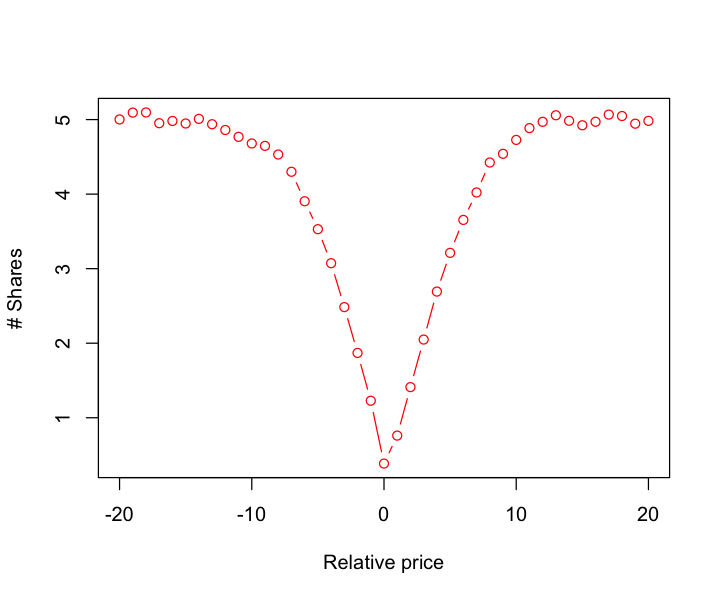

In [10]:
# Plot the order book shape
options(repr.plot.height=5, repr.plot.width=6)
plot(-20:20,avgbookshape,main=NA,xlab="Relative price",ylab="# Shares", 
      col="red", type="b")

Figure 1 order book shape with $\alpha$=1, $\mu$=10, $\delta$=1/5

#### Answer of (c)

In [11]:
# The total levels are 2*L=60
P_L<- (num_limit_buy+num_limit_sell)/(2*L)/NumEvents
print(c('The conditional probability of a limit order at a given level is:',P_L))

[1] "The conditional probability of a limit order at a given level is:"
[2] "0.00834283333333333"                                              


#### Answer of (d)

* The variance per limit order is:

$$ \sigma^2_{GO\,PLO}=\sigma^2_{GO}/(2*P_L)$$


* The characteristic distance of GO per limit order is:

$$ \tilde \Delta_{GO\,PLO}=\sqrt{\frac{\sigma^2_{GO\,PLO}}{2*\delta}}$$

* The numbers are as following:

In [12]:
sigma2_GO<- 0.083
sigma2_GOPLO<- sigma2_GO/(2*P_L)
cd_GOPLO<- sqrt(sigma2_GOPLO/(2*delta))

print(c("The variance per limit order is:",sigma2_GOPLO))
print(c("The characteristic distance of GO per limit order is:",cd_GOPLO))

[1] "The variance per limit order is:" "4.97432926463831"                
[1] "The characteristic distance of GO per limit order is:"
[2] "3.52644625105726"                                     


#### Answer of (e)

In [13]:
sigma2_DA<- (mu^2)*delta/(alpha^2)
cd_DA<- sqrt(sigma2_DA/(2*delta))
print(c("The characteristic distance of DA  is:",cd_DA))

[1] "The characteristic distance of DA  is:"
[2] "7.07106781186548"                      


#### Answer of (f)

The order book densities of GO and DA can be computed by:

\begin{eqnarray*}
\rho_{BMP}(\Delta) &=& \frac{\alpha}{\delta}\,\left\{e^{-\Delta/{\tilde \Delta}}\,\int_0^{\Delta/{\tilde\Delta}}\,\sinh(u)\,du + \sinh(\Delta/{\tilde \Delta})\,\int_{\Delta/{\tilde\Delta}}^\infty\,e^{-u}\,du\right\} \\
&=&\frac{\alpha}{\delta}\,\left\{1 - e^{-\Delta/{\tilde \Delta}}  \right\}
\end{eqnarray*}

#### Answer of (g)

In [14]:
# The function of computing the densities
rho_BMP<- function(alpha,delta,deltaD,deltaDT){
    
    # formula from (f)
    return (alpha*(1-exp(-abs(deltaD)/deltaDT))/delta)
    # abs: to get the curve of negative DELTA
}

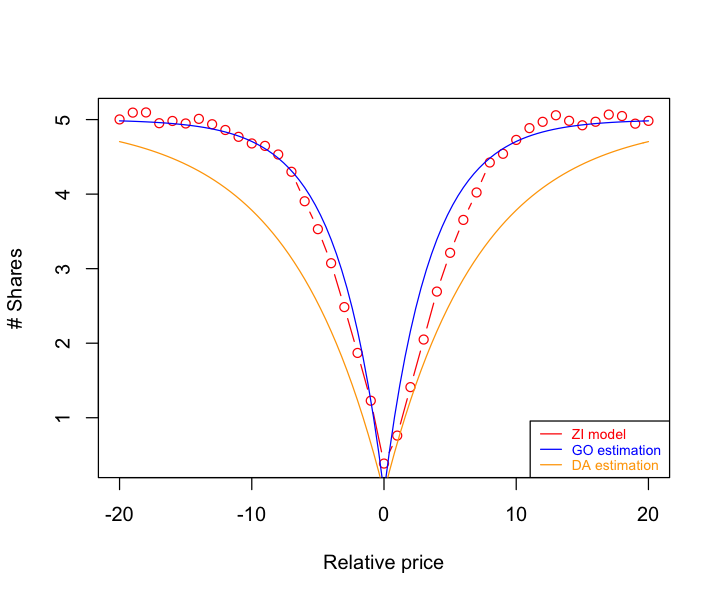

In [15]:
# Plot the order book shape and the curves from GO and DA estimation
# Plot the order book shape
options(repr.plot.height=5, repr.plot.width=6)
plot(-20:20,avgbookshape,main=NA,xlab="Relative price",ylab="# Shares", 
      col="red", type="b")
curve(rho_BMP(1,1/5,x,cd_GOPLO),from=-20,to=20,col="blue",add=TRUE)
curve(rho_BMP(1,1/5,x,cd_DA),from=-20,to=20,col="orange",add=TRUE)
legend("bottomright",legend = c("ZI model","GO estimation","DA estimation"),lty=c(1,1,1),
      col=c("red","blue","orange"),text.col=c("red","blue","orange"),
        cex=0.7,text.width=7.0,y.intersp=1.5)

Figure 2 order book shape (red) with $\alpha$=1, $\mu$=10, $\delta$=1/5, GO estimation plot (blue) and DA estimation plot (orange)

### 5. (6 points)

Another of Mike and Farmer's observations is that the distribution of marketable as well as unmarketable limit orders as a function of distance $\Delta$ to the same-side best quote is well-described by a Student-$t$ distribution.  Assume $\mu=1/2$ as above.

(a) Derive an expression in terms of the Student-$t$ cumulative density function for the ratio of arrival rates of limit to market orders as a function of the spread $s$.  How does this ratio vary with $s$?

(b) Relative to the zero-intelligence model, does this empirically observed strategic behavior make the spread revert faster or more slowly?

### Answer of Q5

#### Answer of (a)

Denote $F$ is the cumulative density function of Student-$t$ distribution. The limit orders as a function of distance $\Delta$ to the same-side best quote is Student-$t$ distribution, and distance to the best bid quote plus the distance to the best offer quote is the spread $s$. Therefore:

* The **number of limit orders** with spread $s$ is $F(s)$.
* The number of market orders is $1-F(s)$.
* The ratio of limit orders over market orders is $F(s)/(1-F(s))$.
* The cdf of Studnet-$t$ is monotonous increasing function in the domain. Thereby, the ratio increases with increasing of spread $s$.

#### Answer of (b)

This observed behavior makes the spread revert faster, since the cdf of Studnet-$t$ is monotonous increasing function in the domain.

* $s$ increases $\rightarrow F(s)$ increases: The number of market orders increases with increasing spread $s$. And then the increasing number of market orders widen the spread.
* $s$ decreases $\rightarrow 1-F(s)$ increases: The number of limit orders increases with decreasing spread $s$. And then the increasing number of limit orders narrow the spread.

Therefore, the empirically observed strategic behavior makes the spread revert faster.

### References

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-GO"><span class="mw-cite-backlink"><b><a href="#cite_ref-GO">^</a></b></span> Jim Gatheral and Roel C. A Oomen, Zero-intelligence realized variance estimation, <span>*Finance and Stochastics*,</span> <span>**14**</span>(2) 249–283, 2010.</li>

</ol>

In [16]:
# End recording the running time
print('The running time of this notebooks is: ')
proc.time()-ptm

[1] "The running time of this notebooks is: "


   user  system elapsed 
103.126   0.209 103.890 